In [20]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
data = pd.read_csv("Position_Salaries.csv")

In [22]:
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [23]:
X = data['Level'].values.reshape(-1,1)
y = data['Salary'].values.reshape(-1,1)
#we have converted the data into two arrays X and Y for the level and salary coloumn respectively.

In [24]:
m, n = X.shape

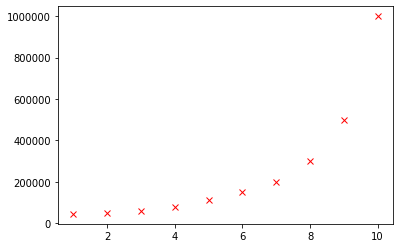

In [25]:
plt.plot(X, y, 'rx')
#plotting the points (X,Y)


In [26]:
X = np.hstack((np.ones((m, 1)), X))
#stacking a coloumn of 1's in the array X (bias factor)

In [27]:
X = np.hstack((
    X,
    (X[:, 1] ** 2).reshape((m, 1)),
    (X[:, 1] ** 3).reshape((m, 1)),
    (X[:, 1] ** 4).reshape((m, 1))
))
# creating a polynomial having degree 4 using hstack to get polynomial regression equation.

In [28]:
m, n = X.shape

In [29]:
X[:, 1:] = (X[:, 1:] - np.mean(X[:, 1:], axis=0)) / np.std(X[:, 1:], axis=0)
# Normalising the values of array X

In [30]:
X = (X+1.5)*(10/3)
#shifting the values in X axis

In [31]:
def h(X, theta):
    return X @ theta
# multiplying the different degrees of X with their respective coefficients in theta (HYPOTHESIS FUNCTION)

In [32]:
theta = np.random.rand(n)
predictions = h(X, theta)
# theta is an array of size 5 since a degree 4 polynomial has 5 coefficients here n=5;

In [33]:
y.shape = (y.shape[0],)
#trying to shape y from (500,1) to (500,) to perform the matrix operations further

In [34]:
def J(theta, X, y):
    return np.mean(np.square(h(X, theta) - y))
# Calculating the cost function

In [35]:
alpha = 0.01
# defining the learning rate

In [36]:
losses = []
for _ in range(1000):
    theta = theta - alpha * (1/m) * (X.T @ ((X @ theta) - y))
    losses.append(J(theta, X, y))
# generating the loss and training the model

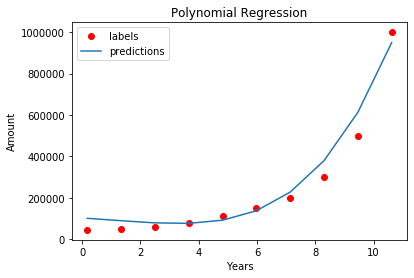

In [37]:
X=X+0.4
predictions = h(X, theta)
plt.plot(X[:, 1], y, 'ro' ,label='labels')

plt.plot(X[:, 1], predictions, label='predictions')
plt.title('Polynomial Regression')
plt.xlabel('Years') 
plt.ylabel('Amount') 
plt.legend()


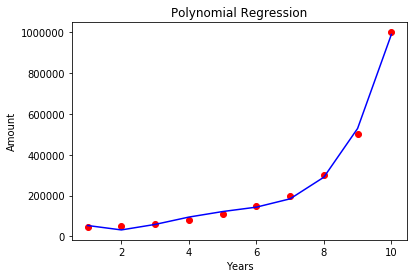

In [38]:
X1 = data['Level'].values.reshape(-1,1)
y1 = data['Salary'].values.reshape(-1,1)

from sklearn.linear_model import LinearRegression 
lin = LinearRegression() 
  
lin.fit(X1, y1) 
from sklearn.preprocessing import PolynomialFeatures 
  
poly = PolynomialFeatures(degree = 4) 
X1_poly = poly.fit_transform(X1) 
  
poly.fit(X1_poly, y1) 
lin2 = LinearRegression() 
lin2.fit(X1_poly, y1) 
plt.scatter(X1, y1,color = 'red') 
  
plt.plot(X1, lin2.predict(poly.fit_transform(X1)),color = 'blue') 
plt.title('Polynomial Regression')
plt.xlabel('Years') 
plt.ylabel('Amount') 
  
plt.show() 
#implementing polynomial regression using scikit learn